In [5]:
from gensim import corpora, models, matutils
import matplotlib.pyplot as plt
import numpy as np
from collections import Iterable,Iterator

个人理解的ap.dat中的数据 第一个是文档id 剩下是该文档中出现的词语的id对应的出现次数

In [2]:
corpus = corpora.BleiCorpus('charpter_4_data/ap.dat','charpter_4_data/vocab.txt')

从文件读取的corpus可以迭代，但并不是生成器。因为没有next()内置函数
生成器可迭代最大的区别就是生成器可以根据算法，输出next的值。两者都可以使用for in 来获得内部数据

In [9]:
print type(corpus)
print isinstance(corpus,Iterable)
isinstance(corpus,Iterator)

<class 'gensim.corpora.bleicorpus.BleiCorpus'>
True


False

In [12]:
corpus_test = iter(corpus)
print isinstance(corpus_test,Iterator)  #这样就把语料转化为生成器了。可以使用next获得下个值
# next(corpus_test)

True


In [13]:
model = models.ldamodel.LdaModel(corpus,num_topics=100,id2word=corpus.id2word)

matutils.corpus2dense 可以把[topic_id,value),...]类型数据转化为稠密矩阵。

In [23]:
topics = matutils.corpus2dense(model[corpus], num_terms=model.num_topics)  #主题是行，每一列是每一篇文档

In [29]:
print topics.shape
topics

(100L, 2246L)


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.24493136,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.16200054,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.3140634 ]], dtype=float32)

In [31]:
topics.sum(1).shape

(100L,)

In [35]:
weight = topics.sum(1)   #(1)代表行相加
max_topic = weight.argmax()
print max_topic  #最大主题的值的id

53


In [39]:
words = model.show_topic(max_topic, 64)
words[:5]  # 当前主题的名称及该名称和该主题的关联程度

[(u'i', 0.0082389711719977367),
 (u'people', 0.0067621366889760483),
 (u'percent', 0.0051110561063062018),
 (u'year', 0.0045013158104237859),
 (u'state', 0.0043854486053452463)]

In [41]:
from pytagcloud import create_tag_image, make_tags   #建立次云的函数
words=[(v,int(w*10000)) for v,w in words]
tags = make_tags(words, maxsize=120)
create_tag_image(tags, 'charpter_4_tagcloud', size=(1800, 1200), fontname=fontname)

NameError: name 'fontname' is not defined

In [48]:
def create_cloud(oname, words,maxsize=120, fontname='Lobster'):

    # gensim returns a weight between 0 and 1 for each word, while pytagcloud
    # expects an integer word count. So, we multiply by a large number and
    # round. For a visualization this is an adequate approximation.
    # We also need to flip the order as gensim returns (value, word), whilst
    # pytagcloud expects (word, value):
    words = [(w,int(v*10000)) for v,w in words]
    tags = makfrom __future__ import print_function
warned_of_error = False

def create_cloud(oname, words,maxsize=120, fontname='Lobster'):
    '''Creates a word cloud (when pytagcloud is installed)

    Parameters
    ----------
    oname : output filename
    words : list of (value,str)
    maxsize : int, optional
        Size of maximum word. The best setting for this parameter will often
        require some manual tuning for each input.
    fontname : str, optional
        Font to use.
    '''
    try:
        from pytagcloud import create_tag_image, make_tags
    except ImportError:
        if not warned_of_error:
            print("Could not import pytagcloud. Skipping cloud generation")
        return

    # gensim returns a weight between 0 and 1 for each word, while pytagcloud
    # expects an integer word count. So, we multiply by a large number and
    # round. For a visualization this is an adequate approximation.
    # We also need to flip the order as gensim returns (value, word), whilst
    # pytagcloud expects (word, value):
    words = [(w,int(v*10000)) for v,w in words]
    tags = make_tags(words, maxsize=maxsize)
    create_tag_image(tags, oname, size=(1800, 1200), fontname=fontname)
e_tags(words, maxsize=maxsize)
    create_tag_image(tags, oname, size=(1800, 1200), fontname=fontname)


In [49]:
create_cloud('cloud_blei_lda.png', words)


ValueError: invalid literal for int() with base 10: 'percentpercentpercentpercentpercentpercentpercentpercentpercentpercentpercentpercentpercentpercentpercentpercentpercentpercentpercentpercentpercentpercentpercentpercentpercentpercentpercentpercentperc'

(array([   0.,   37.,   51.,   97.,  126.,  161.,  163.,  213.,  217.,
         188.,  215.,  180.,  169.,  109.,  101.,   73.,   66.,   39.,
          20.,   18.,    2.,    0.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 41 Patch objects>)

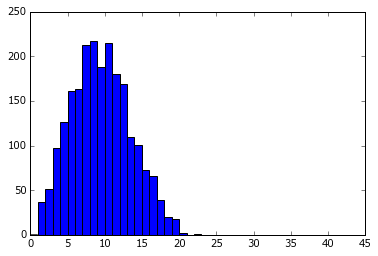

In [23]:
plt.hist(topics,bins = np.arange(42))  #用hist画图，引入numpy数组，相当于bins，给出边缘

In [22]:
plt.hist?

In [24]:
model = models.ldamodel.LdaModel(corpus,num_topics=100,id2word=corpus.id2word,alpha=1)

In [26]:
topics1 = [len(model[c])  for c in corpus]

(array([   0.,    2.,    7.,   12.,    8.,   19.,   15.,   18.,   23.,
          14.,   24.,   25.,   29.,   39.,   49.,   61.,   84.,   89.,
         125.,  132.,  166.,  167.,  172.,  149.,  140.,  136.,  106.,
          93.,   75.,   62.,   46.,   50.,   26.,   27.,   12.,   14.,
           6.,    3.,    2.,    7.,    4.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 41 Patch objects>)

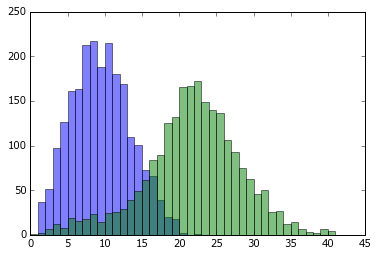

In [32]:
fig,ax = plt.subplots()
ax.hist(topics,bins = np.arange(42),alpha=.5)
ax.hist(topics1,bins = np.arange(42),alpha=.5)

In [39]:
model.show_topic(3)

[(u'two', 0.0050447548635294999),
 (u'percent', 0.0049554372391350356),
 (u'new', 0.0048437872001383759),
 (u'people', 0.0044004726183238928),
 (u'i', 0.004356264001921825),
 (u'government', 0.0043345908488986173),
 (u'nam', 0.0038090670617838746),
 (u'united', 0.0031232184322996623),
 (u'years', 0.0029066753031707195),
 (u'robertsons', 0.0028551230111813881)]

In [3]:
from pytagcloud import create_tag_image, make_tags

In [7]:
make_tags?

In [51]:
%matplotlib inline

In [60]:
from pytagcloud import create_tag_image, make_tags
from pytagcloud.lang.counter import get_tag_counts

YOUR_TEXT = "A tag cloud is a visual representation for text data, typically\
used to depict keyword metadata on websites, or to visualize free form text."

# tags = make_tags(get_tag_counts(YOUR_TEXT), maxsize=120)

create_tag_image(tags, 'cloud_large.png', size=(900, 600), fontname='Lobster')

In [54]:
get_tag_counts(YOUR_TEXT)

[('text', 2),
 ('depict', 1),
 ('visualize', 1),
 ('keyword', 1),
 ('websites', 1),
 ('typicallyused', 1),
 ('visual', 1),
 ('tag', 1),
 ('form', 1),
 ('free', 1),
 ('representation', 1),
 ('data', 1),
 ('cloud', 1),
 ('metadata', 1)]

In [58]:
tags

[{'color': (124, 167, 120), 'size': 133, 'tag': u'percent'},
 {'color': (108, 38, 182), 'size': 110, 'tag': u'million'},
 {'color': (83, 45, 185), 'size': 98, 'tag': u'year'},
 {'color': (198, 162, 191), 'size': 76, 'tag': u'new'},
 {'color': (60, 193, 156), 'size': 75, 'tag': u'people'},
 {'color': (81, 62, 11), 'size': 70, 'tag': u'sales'},
 {'color': (43, 127, 69), 'size': 65, 'tag': u'states'},
 {'color': (86, 51, 110), 'size': 62, 'tag': u'national'},
 {'color': (197, 127, 160), 'size': 59, 'tag': u'last'},
 {'color': (90, 10, 50), 'size': 59, 'tag': u'two'},
 {'color': (47, 47, 43), 'size': 58, 'tag': u'pacs'},
 {'color': (203, 13, 158), 'size': 56, 'tag': u'i'},
 {'color': (131, 117, 40), 'size': 54, 'tag': u'defense'},
 {'color': (28, 123, 203), 'size': 52, 'tag': u'years'},
 {'color': (36, 40, 172), 'size': 52, 'tag': u'government'},
 {'color': (171, 134, 52), 'size': 51, 'tag': u'billion'},
 {'color': (44, 128, 100), 'size': 51, 'tag': u'state'},
 {'color': (84, 149, 85), 'si

In [63]:
list(enumerate(range(3)))

[(0, 0), (1, 1), (2, 2)]

In [9]:
from gensim import corpora
import gensim

In [4]:
documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
              "The EPS user interface management system",
              "System and human system engineering testing of EPS",
              "Relation of user perceived response time to error measurement",
              "The generation of random binary unordered trees",
              "The intersection graph of paths in trees",
              "Graph minors IV Widths of trees and well quasi ordering",
              "Graph minors A survey"]

In [5]:
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist] for document in documents]
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1  
texts = [[token for token in text if frequency[token]>1] for text in texts]

In [7]:
texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [10]:
dictionary = gensim.corpora.Dictionary(texts)

In [20]:
dictionary.dfs

{0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 2, 9: 3, 10: 3, 11: 2}

In [21]:
dictionary.token2id

{u'computer': 1,
 u'eps': 8,
 u'graph': 10,
 u'human': 2,
 u'interface': 0,
 u'minors': 11,
 u'response': 3,
 u'survey': 5,
 u'system': 6,
 u'time': 4,
 u'trees': 9,
 u'user': 7}

In [17]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [22]:
corpus

[[(0, 1), (1, 1), (2, 1)],
 [(1, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(0, 1), (6, 1), (7, 1), (8, 1)],
 [(2, 1), (6, 2), (8, 1)],
 [(3, 1), (4, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(5, 1), (10, 1), (11, 1)]]

In [31]:
model = gensim.models.LdaModel(corpus,num_topics=5,id2word=dict(dictionary.iteritems()))

In [34]:
model.show_topics(num_topics=10,num_words=10)

[(0,
  u'0.261*graph + 0.259*trees + 0.143*minors + 0.143*survey + 0.025*system + 0.024*user + 0.024*human + 0.024*interface + 0.024*eps + 0.024*computer'),
 (1,
  u'0.233*system + 0.128*trees + 0.127*human + 0.127*graph + 0.127*eps + 0.127*minors + 0.022*user + 0.022*interface + 0.022*time + 0.022*response'),
 (2,
  u'0.220*time + 0.220*response + 0.220*user + 0.039*trees + 0.038*graph + 0.038*system + 0.038*minors + 0.038*interface + 0.037*computer + 0.037*survey'),
 (3,
  u'0.177*system + 0.177*user + 0.097*survey + 0.097*time + 0.097*computer + 0.097*response + 0.097*interface + 0.096*eps + 0.017*trees + 0.017*graph'),
 (4,
  u'0.220*computer + 0.220*human + 0.220*interface + 0.039*trees + 0.038*graph + 0.038*user + 0.038*minors + 0.038*system + 0.037*response + 0.037*survey')]

In [38]:
documents

['Human machine interface for lab abc computer applications',
 'A survey of user opinion of computer system response time',
 'The EPS user interface management system',
 'System and human system engineering testing of EPS',
 'Relation of user perceived response time to error measurement',
 'The generation of random binary unordered trees',
 'The intersection graph of paths in trees',
 'Graph minors IV Widths of trees and well quasi ordering',
 'Graph minors A survey']

In [46]:
texts = model.show_topic(0)

In [40]:
from pytagcloud import create_tag_image, make_tags
from pytagcloud.lang.counter import get_tag_counts

In [50]:
YOUR_TEXT = "A tag cloud is a visual representation for text data, typically\
used to depict keyword metadata on websites, or to visualize free form text."

tags = make_tags(texts, maxsize=120)


In [51]:
tags

[{'color': (18, 49, 26), 'size': 129, 'tag': u'graph'},
 {'color': (146, 123, 47), 'size': 128, 'tag': u'trees'},
 {'color': (102, 132, 50), 'size': 81, 'tag': u'minors'},
 {'color': (148, 47, 71), 'size': 81, 'tag': u'survey'},
 {'color': (142, 198, 177), 'size': 22, 'tag': u'system'},
 {'color': (192, 79, 44), 'size': 21, 'tag': u'user'},
 {'color': (130, 212, 173), 'size': 21, 'tag': u'human'},
 {'color': (214, 206, 40), 'size': 21, 'tag': u'interface'},
 {'color': (81, 148, 149), 'size': 21, 'tag': u'eps'},
 {'color': (169, 21, 67), 'size': 21, 'tag': u'computer'}]

In [54]:
create_tag_image(tags, 'cloud_large.png', size=(900, 600))

In [53]:
create_tag_image?

In [49]:
texts

[(u'graph', 0.26106448397887805),
 (u'trees', 0.25857943037630465),
 (u'minors', 0.14294517579191277),
 (u'survey', 0.14273301233952601),
 (u'system', 0.02459873602909797),
 (u'user', 0.024357652011576036),
 (u'human', 0.024354963065646291),
 (u'interface', 0.024303535997550006),
 (u'eps', 0.024301874603322515),
 (u'computer', 0.024293051563111349)]

In [197]:
with open('data/vocab.txt','w') as f:
    for i in dictionary.token2id.iterkeys():
        f.write(i+'\n')

In [194]:
dictionary.id2token

{}

In [200]:
corpora.BleiCorpus.serialize('data/deerwester.lda-c',corpus)
corpus

[[(0, 1), (1, 1), (2, 1)],
 [(1, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(0, 1), (6, 1), (7, 1), (8, 1)],
 [(2, 1), (6, 2), (8, 1)],
 [(3, 1), (4, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(5, 1), (10, 1), (11, 1)]]

In [203]:
corpus = corpora.BleiCorpus('data/deerwester.lda-c','data/vocab.txt')
corpus.id2word

{0: u'minors',
 1: u'graph',
 2: u'system',
 3: u'trees',
 4: u'eps',
 5: u'computer',
 6: u'survey',
 7: u'user',
 8: u'human',
 9: u'time',
 10: u'interface',
 11: u'response'}

In [84]:
dict(dictionary.iteritems())

{0: u'interface',
 1: u'computer',
 2: u'human',
 3: u'response',
 4: u'time',
 5: u'survey',
 6: u'system',
 7: u'user',
 8: u'eps',
 9: u'trees',
 10: u'graph',
 11: u'minors'}

In [85]:
dictionary.id2token

{0: u'interface',
 1: u'computer',
 2: u'human',
 3: u'response',
 4: u'time',
 5: u'survey',
 6: u'system',
 7: u'user',
 8: u'eps',
 9: u'trees',
 10: u'graph',
 11: u'minors'}

In [72]:
model = gensim.models.LdaModel(corpus,num_topics=5,id2word=dict(dictionary.iteritems()))

In [73]:
model.show_topics(num_topics=5,num_words=5)

[(0, u'0.231*trees + 0.128*user + 0.128*system + 0.128*interface + 0.128*eps'),
 (1,
  u'0.152*response + 0.152*user + 0.152*computer + 0.152*time + 0.084*system'),
 (2,
  u'0.260*graph + 0.260*minors + 0.143*trees + 0.142*survey + 0.025*system'),
 (3, u'0.341*system + 0.186*human + 0.186*eps + 0.033*trees + 0.032*graph'),
 (4,
  u'0.086*trees + 0.085*graph + 0.083*computer + 0.083*human + 0.083*system')]

In [75]:
query = 'minors computer EPS trees'.lower().split()
query = dictionary.doc2bow(query)
model[query]

[(0, 0.38933770517330807),
 (1, 0.23744547819235201),
 (2, 0.29193456748018021),
 (3, 0.041206303188095164),
 (4, 0.04007594596606455)]

{0: u'interface',
 1: u'computer',
 2: u'human',
 3: u'response',
 4: u'time',
 5: u'survey',
 6: u'system',
 7: u'user',
 8: u'eps',
 9: u'trees',
 10: u'graph',
 11: u'minors'}

[主题模型参考连接](http://christop.club/2014/05/06/using-gensim-for-lda/)

In [2]:
import gensim

In [33]:
corpus = gensim.corpora.MalletCorpus('android.mallet')

In [34]:
next(iter(corpus)

[(6936, 1), (15314, 1), (300, 1), (10981, 1)]

In [35]:
for word_id, freq in next(iter(corpus)):
    print corpus.id2word[word_id],freq

incorrect 1
url 1
address 1
project 1


In [29]:
model = gensim.models.LdaModel(corpus, id2word=corpus.id2word,alpha='auto',num_topics=25)

In [30]:
model.save('android.lda')

In [38]:
model.show_topics(num_topics=5,num_words=5)

[(19,
  u'0.056*bluetooth + 0.053*rotate + 0.042*device + 0.041*appears + 0.039*tapping'),
 (7,
  u'0.041*image + 0.036*activity + 0.036*orientation + 0.032*changing + 0.031*talkback'),
 (20,
  u'0.152*force + 0.152*close + 0.078*device + 0.058*google + 0.036*store'),
 (9, u'0.084*search + 0.067*app + 0.061*apps + 0.043*android + 0.033*google'),
 (14,
  u'0.110*screen + 0.083*display + 0.061*talk + 0.041*google + 0.036*message')]

In [42]:
query = 'google maps broken navigation'
query = query.split()
query

['google', 'maps', 'broken', 'navigation']

In [44]:
id2word = gensim.corpora.Dictionary()

In [48]:
_ = id2word.merge_with(corpus.id2word)

In [53]:
query = id2word.doc2bow(query)

In [54]:
query

[(1754, 1), (6081, 1), (8441, 1), (9208, 1)]

In [55]:
model[query]

[(2, 0.21279077701609347),
 (6, 0.34903476228841951),
 (9, 0.22977590024952316),
 (14, 0.011128732897349128),
 (18, 0.010500770252321833),
 (20, 0.010615757919780026),
 (24, 0.010113419773976966)]

In [56]:
a = list(sorted(model[query],key=lambda x:x[1]))

In [60]:
model.print_topic(a[0][0])

u'0.147*galaxy + 0.081*error + 0.061*samsung + 0.053*video + 0.042*sync + 0.027*usb + 0.020*tab + 0.018*playing + 0.015*youtube + 0.015*won'

In [61]:
model.print_topic(a[-1][0])

u'0.126*maps + 0.097*google + 0.031*issues + 0.025*library + 0.022*android + 0.021*map + 0.020*code + 0.020*http + 0.019*audio + 0.019*cut'

word2vec   
[参考文档](https://rare-technologies.com/word2vec-tutorial/)

In [65]:
sentences = [['first', 'sentence'], ['second', 'sentence']]
# train word2vec on the two sentences
model = gensim.models.Word2Vec(sentences, min_count=1)

In [66]:
model

In [67]:
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [68]:
sentences = [['first', 'sentence'], ['second', 'sentence']]

In [69]:
model = gensim.models.Word2Vec(sentences, min_count=1)

In [71]:
import os

In [78]:
path = u'C:/机器学习与数据处理/机器学习与系统设计/ch03/data/379/raw/alt.atheism'

In [79]:
class MySentences(object):
    def __init__(self,dirname):
        self.dirname = dirname
        
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            for line in open(os.path.join(self.dirname,fname)):
                yield line.split()

In [83]:
sentence = MySentences(path)
model = gensim.models.Word2Vec(sentence,min_count=5,size=100,workers=4)

In [88]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('theism.', 0.9937639236450195)]

In [97]:
model['computer']

array([-0.0027178 ,  0.05918064, -0.06189532,  0.00907266, -0.08397242,
        0.05338817,  0.01529701, -0.01749658,  0.00540508,  0.00269244,
       -0.0220203 , -0.03849806, -0.08271151, -0.05464442,  0.01380851,
        0.08228371,  0.03584717, -0.00431925, -0.00129583, -0.06132043,
       -0.02048909,  0.01641259, -0.013035  ,  0.04619684,  0.03818746,
        0.00607216, -0.02680536,  0.00349478, -0.05934826, -0.08449085,
       -0.05203914,  0.07651855, -0.02497313, -0.02956362, -0.01962879,
        0.04709732,  0.0045994 ,  0.05149817,  0.02439816, -0.07303267,
       -0.05347825, -0.00451079, -0.04885635, -0.03220316, -0.013047  ,
       -0.01085811, -0.02565059, -0.00866326,  0.01757615,  0.03724797,
        0.00110219,  0.00061661,  0.01732209, -0.0432818 , -0.03118575,
        0.0043029 ,  0.01539845,  0.00929784,  0.02832262, -0.04309537,
        0.02651683,  0.04500728,  0.04416023, -0.01968707,  0.04053949,
       -0.04333499, -0.05187358,  0.03895269,  0.03010694, -0.00

目标：
1. 去掉英文字母
2. 去掉中文停用词
3. 考虑是否加入图书标签

In [83]:
import pandas as pd
import numpy as np
import jieba
import re
import gensim

In [8]:
import MySQLdb as mdb
from pandas import Series,DataFrame
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
def mysql_con():
    try:
        db = mdb.connect('mysql-slave.communion.net.cn', 'onlyquery', 'jyhc@onlyquery', 'hainan_bigdata', charset='utf8')
        cursor = db.cursor()
    except:
        time.sleep(10)
        db = mdb.connect('mysql-slave.communion.net.cn', 'onlyquery', 'jyhc@onlyquery', 'hainan_bigdata', charset='utf8')
        cursor = db.cursor()
    return cursor,db

In [4]:
cursor,db = mysql_con()

In [5]:
article = pd.read_sql('select id,content from tbl_article limit 5000',index_col='id',con=db)

In [6]:
#去掉空白字符及数字、字母
result = re.sub(r'[\s\w]','',article.content.values[13],flags=re.S)

In [136]:
stop_words = []
with codecs.open('stop_words.txt','r','utf8') as fp:
    for word in fp.readlines():
        if word.strip() == u'':
            continue
        stop_words.append(word.strip())

In [137]:
jieba.cut

[u'\u2014\u2014\u2014',
 u'\u300b\uff09\uff0c',
 u'\uff09\xf7\uff08\uff11\uff0d',
 u'\u201d\uff0c',
 u'\uff09\u3001',
 u'\uff1d\uff08',
 u':',
 u'\u2192',
 u'\u2103',
 u'&',
 u'*',
 u'\u4e00\u4e00',
 u'~~~~',
 u'\u2019',
 u'.',
 u'\u300e',
 u'.\u4e00',
 u'./',
 u'--',
 u'\u300f',
 u'\uff1d\u2033',
 u'\u3010',
 u'\uff3b\uff0a\uff3d',
 u'\uff5d\uff1e',
 u'\uff3b\u2464\uff3d\uff3d',
 u'\uff3b\u2460\uff24\uff3d',
 u'\uff43\uff3d',
 u'\uff4e\uff47\u6609',
 u'\uff0a',
 u'//',
 u'\uff3b',
 u'\uff3d',
 u'\uff3b\u2461\uff45\uff3d',
 u'\uff3b\u2461\uff47\uff3d',
 u'\uff1d\uff5b',
 u'}',
 u'\uff0c\u4e5f',
 u'\u2018',
 u'\uff21',
 u'\uff3b\u2460\u2465\uff3d',
 u'\uff3b\u2461\uff22\uff3d',
 u'\uff3b\u2460\uff41\uff3d',
 u'\uff3b\u2463\uff41\uff3d',
 u'\uff3b\u2460\u2462\uff3d',
 u'\uff3b\u2462\uff48\uff3d',
 u'\u2462\uff3d',
 u'\uff11\uff0e',
 u'\uff0d\uff0d',
 u'\uff3b\u2461\uff42\uff3d',
 u'\u2019\u2018',
 u'\xd7\xd7\xd7',
 u'\uff3b\u2460\u2467\uff3d',
 u'\uff10\uff1a\uff12',
 u'\uff1d\uff3b',
 u

In [141]:
with codecs.open('stop_words2.txt','w','utf8') as f:
    for i in stop_words:
        f.write(i+'\n')

In [234]:
temp = article.content.apply(lambda x:[word for word in jieba.cut(x, cut_all=True) if len(word) >= 2 and word.isdigit() == False])

KeyboardInterrupt: 

In [ ]:
temp = temp.values.tolist()

In [ ]:
dictionary = gensim.corpora.Dictionary(temp)

In [ ]:
corpus = [dictionary.doc2bow(text) for text in temp]

In [ ]:
model = gensim.models.LdaModel(corpus,num_topics=500,id2word=dict(dictionary.iteritems()))

In [204]:
model.show_topics(num_topics=5,num_words=5)

[(342,
  u'0.017*\u5b8b\u5b66 + 0.015*\u5b66\u672f + 0.009*\u6c49\u5b66 + 0.007*\u4e2d\u56fd + 0.006*\u6587\u5b66'),
 (252,
  u'0.012*\u56f4\u57ce + 0.009*\u751f\u6bcd + 0.009*\u6c49\u6587 + 0.009*\u6211\u4eec + 0.008*\u540c\u4e3a'),
 (278,
  u'0.025*\u4e70\u5230 + 0.014*\u59e8\u5988 + 0.012*\u88ab\u4fd8 + 0.011*\u5947\u5e7b + 0.010*\u6c11\u65cf\u5927\u4e49'),
 (256,
  u'0.022*\u4ee3\u8868\u4f5c\u54c1 + 0.021*\u6559\u7687 + 0.017*\u8001\u592b + 0.014*\u8001\u592b\u5b50 + 0.012*\u5316\u51fa'),
 (496,
  u'0.011*\u4e00\u4e2a + 0.010*\n\n + 0.006*\u6211\u4eec + 0.006*\u53ef\u4ee5 + 0.005*\u95ee\u9898')]

In [224]:
Series(model.show_topic(20))

0      (天文, 0.0520484389667)
1      (数学, 0.0481501642149)
2      (十全, 0.0119629145926)
3      (著称, 0.0118229513518)
4      (多几, 0.0116066352684)
5      (喜好, 0.0115809298341)
6    (十全十美, 0.0114911710324)
7      (文法, 0.0107060483353)
8      (数学家, 0.010465392656)
9     (残留, 0.00909555463013)
dtype: object

In [241]:
id = 10
temp_text = article.content.values[id]
print article.content.values[id]

       断断续续花了一周，终于在春节前啃完了这本《政治无意识》，了却夙愿。这两年几次翻开这本书，又几次在术语和作品的迷宫里走失，不得要领地匆匆合上。
      不得不说，读詹姆逊的痛苦和乐趣，都来自他理论视野的广阔。《政治无意识》立足马克思主义，同时借鉴并批判二战后形形色色的“理论”：“无意识”和“白日梦”的概念借自弗洛伊德和拉康的精神分析，叙事结构的政治寓言性来自列维•斯特劳斯的结构主义和本雅明，“历史的文本化”来自福柯、德勒兹、德里达的后结构主义，乌托邦和意识形态的辩证法来自涂尔干的宗教论和恩斯特•布洛克对 “希望”的分析。循着这个庞大的理论对话的谱系，詹姆逊反思了马克思主义文化批评的核心问题，即“作品与现实”的关系问题，着重批评了其两大理论“死结”：一是“文艺作品反映社会现实”的反映论，二是“文艺服务意识形态”的工具论。这两项批判集中在本书的序言和结论，单序言便长达八十多页，足可见这一理论问题在詹姆逊文化批评中的重要位置。在詹姆逊看来，作品与现实的关系本质是语言与历史的关系。（后）结构主义视“语言”为本体，马克思主义视“历史”为本体，要解决这一矛盾，必须抓住语言走向历史的起点：“叙事”。
       在詹姆逊看来，反映论固然是庸俗的唯物论，但其解决方案并非简单的后结构主义“转向”，即对历史和实在的彻底否定（“文本之外无他物”），否则无异于走向了另一种“结构主义的意识形态”。从“叙事”角度，詹姆逊对反映论提出两点修正：1）意识形态恰恰隐藏在叙事形式之中，詹姆逊称为 “ideology of form”， 而“人物”或“故事内容”，不过是叙事的装置和效果。2）作品并非机械的“反映”某一阶级观念，而是一种政治“寓言”，是对现有的不可解决的社会矛盾的象征性、想象性的“解决”（类似列维斯特劳斯描述的巴西印第安部落对称性面饰是对部落不平等关系的想象性解决）。在这一意义上，文本参与组织现实，重构现实（这里的“现实”，不是传统的背景式的context，而是詹姆逊命名的subtext）。
       “工具论”则来自马克思主义传统对意识形态的偏见，将意识形态简单理解为阶级统治的工具。詹姆逊引用本雅明的名言 “Every document of civilization is at the same time a document of barbarism”, 反其道

In [242]:
temp_text = [word for word in jieba.cut(temp_text, cut_all=False) if len(word) >= 2 and word.isdigit() == False]

In [243]:
query_bow = dictionary.doc2bow(temp_text)

In [244]:
print model[query_bow]
topic_id = model[query_bow][0][0]

[(28, 0.019240884230657933), (115, 0.036023090902547329), (196, 0.086139651455947264), (197, 0.57360926360994458), (245, 0.014453650282155166), (353, 0.01276608083098291), (409, 0.025138541680818926), (433, 0.032755856291901808), (454, 0.0221859591144856), (496, 0.12182269458363143), (498, 0.014498521777422498)]


In [245]:
Series(model.show_topic(topic_id))

0       (另类, 0.0117977913891)
1       (拉美, 0.0105638690574)
2      (一个, 0.00975037229343)
3      (自己, 0.00935625435531)
4    (\n\n, 0.00756861409036)
5      (小说, 0.00589571477877)
6      (我们, 0.00487683943112)
7      (就是, 0.00475890138767)
8      (这样, 0.00401048643812)
9      (没有, 0.00386270603317)
dtype: object

In [246]:
model[query_bow]

[(28, 0.018870130139376821),
 (115, 0.030197052963947431),
 (196, 0.085842179766294754),
 (197, 0.57094322189326263),
 (245, 0.014466801286607288),
 (353, 0.012775475253266829),
 (409, 0.025331075150485022),
 (433, 0.033751554590482569),
 (454, 0.022179555665716236),
 (496, 0.12173825148163277),
 (498, 0.014481059946748297)]

In [1]:
import jieba

In [6]:
print ' '.join(jieba.cut(u'喂,我爱北京天安门'))

喂 , 我 爱 北京 天安门
